In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/tmp/ipykernel_12312/2200693214.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('../')
print(os.getcwd())

from utils import weather_api_calls

/home/vadim/projects/MeteoFill


In [6]:
hourly_dataframe = weather_api_calls.get_weather()
hourly_dataframe.head()

,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m
date,,,,,
2021-07-01 00:00:00+00:00,-55.943501,63.008278,624.190918,26.081993,206.211319
2021-07-01 01:00:00+00:00,-56.193501,62.130650,624.546509,25.318008,209.845840
2021-07-01 02:00:00+00:00,-56.393501,61.670197,624.780396,25.762016,213.023880
2021-07-01 03:00:00+00:00,-56.493500,61.243488,624.772888,26.758923,213.476303
2021-07-01 04:00:00+00:00,-56.493500,61.637867,624.834961,26.980793,211.357025


In [7]:
def create_nan(data, prob=0.5):
    mask = np.random.binomial(n=1, p=prob, size=data.shape).astype(np.float32)
    mask[mask == 0] = np.nan
    return mask * data.select_dtypes(include='number')

In [8]:
data_with_nans = create_nan(hourly_dataframe)
data_with_nans

,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m
date,,,,,
2021-07-01 00:00:00+00:00,NaN,63.008278,NaN,26.081993,NaN
2021-07-01 01:00:00+00:00,-56.193501,62.130650,624.546509,25.318008,209.845840
2021-07-01 02:00:00+00:00,NaN,61.670197,624.780396,NaN,NaN
2021-07-01 03:00:00+00:00,NaN,NaN,NaN,26.758923,213.476303
2021-07-01 04:00:00+00:00,-56.493500,NaN,624.834961,26.980793,211.357025
...,...,...,...,...,...
2021-07-10 19:00:00+00:00,-48.093498,NaN,631.609497,23.584808,148.736328
2021-07-10 20:00:00+00:00,NaN,64.245338,NaN,23.966375,NaN
2021-07-10 21:00:00+00:00,NaN,64.973602,NaN,24.363249,NaN


In [9]:
data_with_nans.isna().sum()

temperature_2m          115
relative_humidity_2m    117
surface_pressure        106
wind_speed_10m          119
wind_direction_10m      120
dtype: int64

<Axes: xlabel='date'>

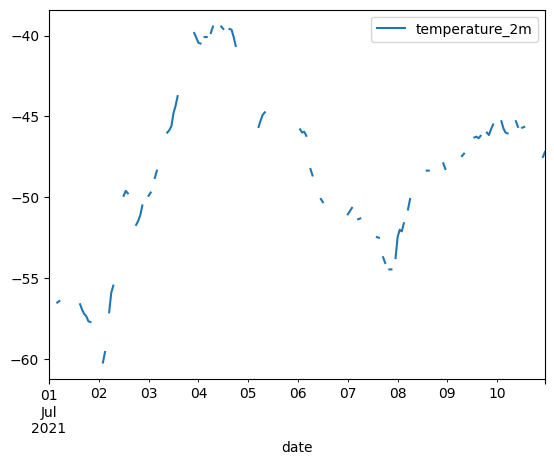

In [10]:
data_with_nans.plot(y="temperature_2m")

In [19]:
# def fill_nans_mean(data):
#     filled_data = data.copy()
#     for column in filled_data.columns[1:]:
#         nan_indices = filled_data[column].index[filled_data[column].apply(np.isnan)]
#         for index in nan_indices:
#             prev_index = filled_data[column].index[filled_data[column].apply(lambda x: not np.isnan(x)) & (filled_data[column].index <= index)].max()
#             next_index = filled_data[column].index[filled_data[column].apply(lambda x: not np.isnan(x)) & (filled_data[column].index >= index)].min()
#             if np.isnan(prev_index):
#                 prev_index = filled_data[column].first_valid_index()
#                 filled_data.loc[index, column] = filled_data.loc[prev_index, column]
#             if np.isnan(next_index):
#                 next_index = filled_data[column].last_valid_index()
#                 filled_data.loc[index, column] = filled_data.loc[prev_index, column]

#             mean_value = (filled_data.at[prev_index, column] + filled_data.at[next_index, column]) / 2

#             filled_data.loc[prev_index+1:next_index-1, column] = mean_value
            
    # return filled_data

def fill_nan_with_mean(data: pd.DataFrame):
    return data.interpolate(method="nearest", order=0).bfill().ffill()

filled_data = fill_nan_with_mean(data_with_nans)

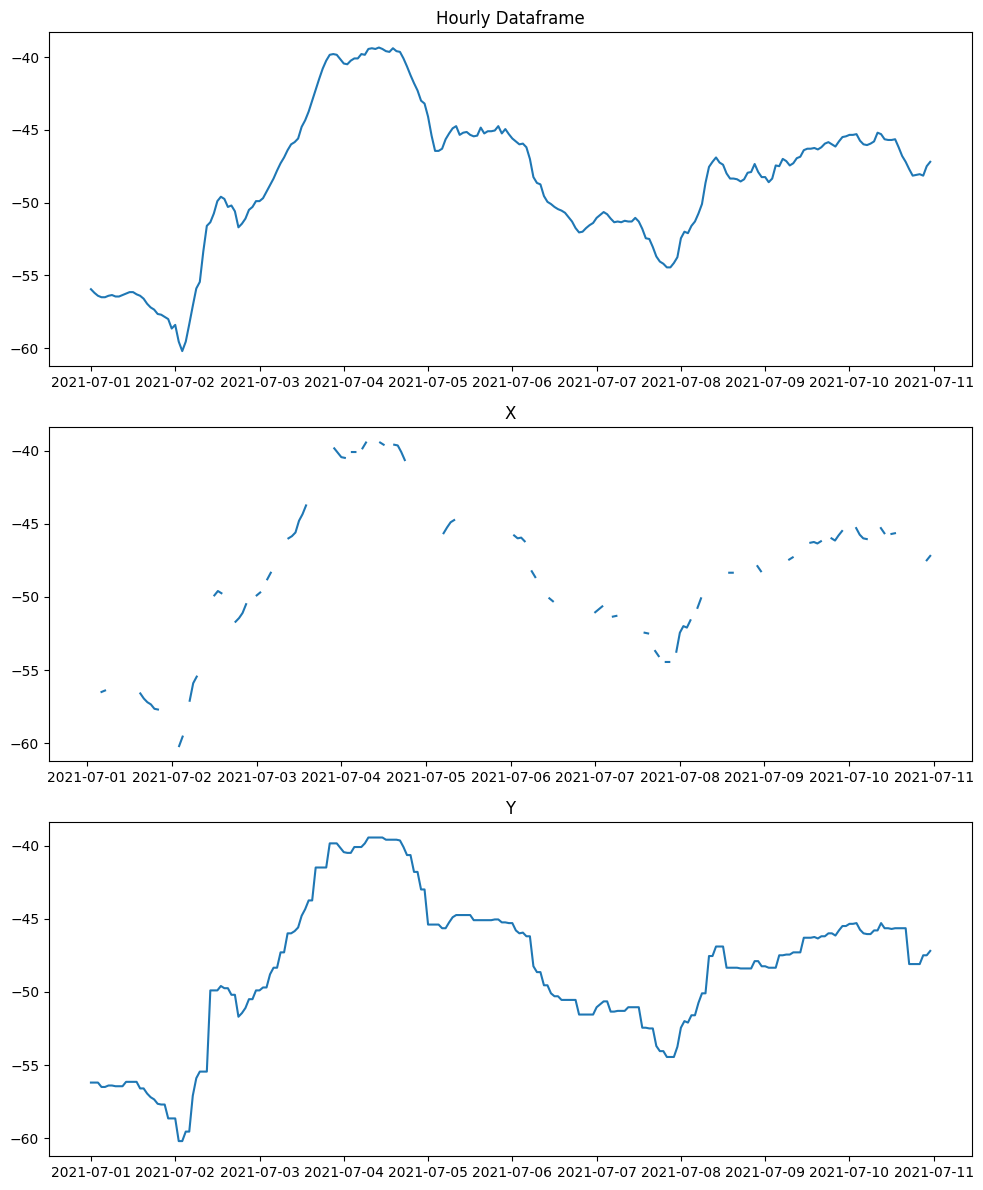

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# График исходных данных
axes[0].plot(hourly_dataframe["temperature_2m"])
axes[0].set_title("Hourly Dataframe")

# График с пропусками
axes[1].plot(data_with_nans["temperature_2m"])
axes[1].set_title("X")

# График заполненных данных
axes[2].plot(filled_data["temperature_2m"])
axes[2].set_title("Y")

plt.tight_layout()
plt.show()



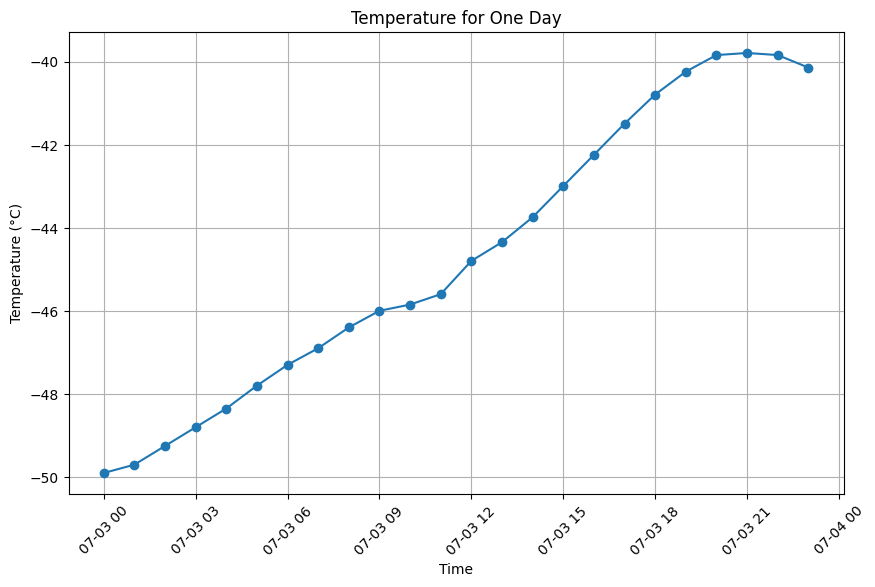

In [26]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = hourly_dataframe[(hourly_dataframe.index >= start_date) & (hourly_dataframe.index <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

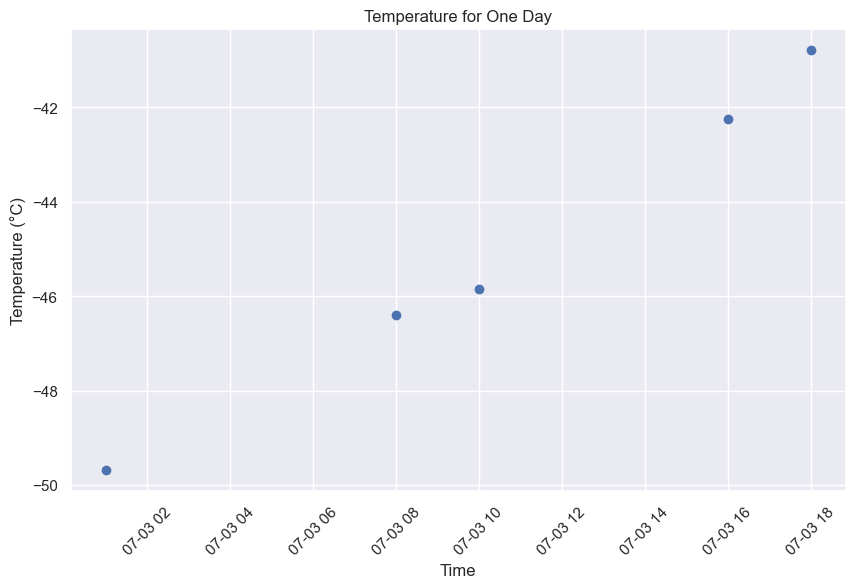

In [ ]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = x[(x['date'] >= start_date) & (x['date'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["date"], one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

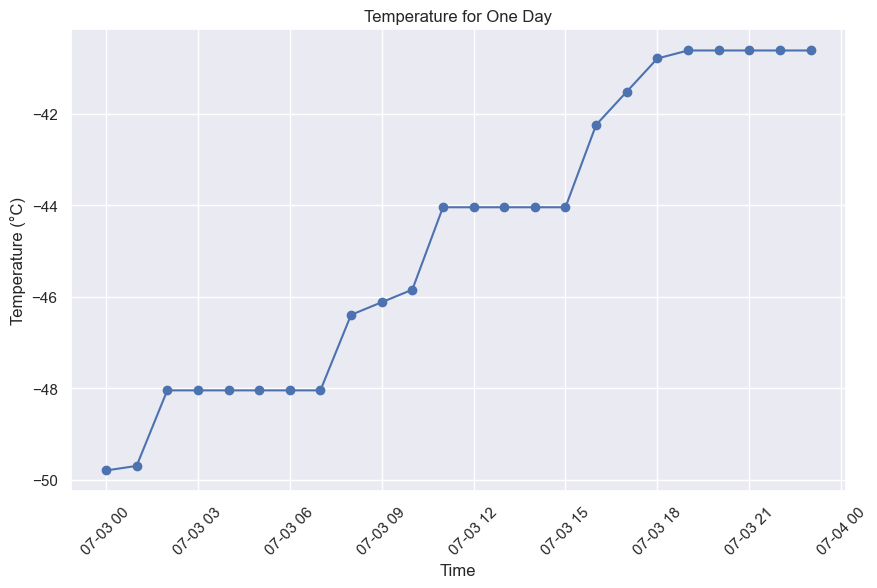

In [ ]:
start_date = '2021-07-03 00:00:00'
end_date = '2021-07-03 23:59:59'

one_day_data = y[(y['date'] >= start_date) & (y['date'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(one_day_data["date"], one_day_data["temperature_2m"], marker='o', linestyle='-')

plt.title("Temperature for One Day")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()